In [2]:
import pandas as pd
dataset = pd.read_csv('car_prices.csv')
dataset.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
mapa = {
    'mileage_per_year' : 'millas_por_anio',
    'model_year' : 'anio_del_modelo',
    'price': 'precio',
    'sold': 'vendido' 
}

dataset = dataset.rename(columns=mapa)
dataset.sample(10)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido
9473,9473,12077,2008,46545.31,yes
3472,3472,16279,2014,77925.66,no
2944,2944,12950,2010,103390.62,yes
9006,9006,15270,2013,57380.48,yes
3631,3631,13325,2005,42560.09,yes
6063,6063,8791,2003,86411.94,yes
8928,8928,18212,2010,61482.86,no
2120,2120,19453,2012,98635.09,no
4256,4256,25321,2008,24043.69,yes
5960,5960,11491,2008,47978.72,yes


In [4]:
cambio = {
    'no':0,
    'yes':1 
}
dataset.vendido = dataset.vendido.map(cambio)
dataset.sample(10)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido
4897,4897,8173,2004,78374.06,1
6548,6548,15990,1999,88525.89,0
5235,5235,9615,2000,41841.70,1
1938,1938,11930,2000,56623.49,1
6978,6978,8347,1999,85148.65,1
569,569,19755,1998,45658.62,1
2375,2375,13732,2001,60193.53,1
1771,1771,9845,2008,46875.22,0
1832,1832,11348,2007,53483.07,0
6004,6004,17799,2000,86614.43,0


In [5]:
from datetime import datetime
anio_actual = datetime.today().year
dataset['edad_carro'] = anio_actual - dataset.anio_del_modelo
dataset.sample(10)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido,edad_carro
538,538,22626,2006,63543.24,0,17
1860,1860,8243,2011,66979.77,0,12
1653,1653,14570,2005,82062.22,0,18
2529,2529,6388,2007,45038.34,0,16
7113,7113,7172,2004,67797.90,1,19
4449,4449,9105,1998,36803.64,1,25
3612,3612,14860,2004,46788.77,1,19
2085,2085,8639,2010,33924.26,1,13
7839,7839,21002,2008,56399.44,1,15
4377,4377,12827,1998,54700.45,1,25


In [6]:
dataset['km_por_anio'] = dataset.millas_por_anio * 1.60934
dataset.sample(10)

,Unnamed: 0,millas_por_anio,anio_del_modelo,precio,vendido,edad_carro,km_por_anio
1037,1037,28357,1998,74653.07,0,25,45636.05438
1885,1885,6718,2010,32562.04,1,13,10811.54612
44,44,11422,2001,53993.85,1,22,18381.88148
9630,9630,11193,1998,74411.60,0,25,18013.34262
9730,9730,10705,2009,98933.72,0,14,17227.98470
1110,1110,20363,2002,60212.66,0,21,32770.99042
11,11,15095,2001,97411.70,0,22,24292.98730
1323,1323,10760,2000,89513.44,1,23,17316.49840
5129,5129,22095,2006,41987.24,1,17,35558.36730
5441,5441,15676,2004,109497.05,1,19,25228.01384


In [7]:
dataset = dataset.drop(columns=['Unnamed: 0', 'millas_por_anio', 'anio_del_modelo'], axis=1)
dataset.sample(10)

,precio,vendido,edad_carro,km_por_anio
5168,22820.93,1,25,26447.89356
2783,104235.13,1,15,18214.51012
4597,87050.30,1,16,19736.94576
96,75457.92,1,13,22723.88080
9808,40193.47,1,23,21737.35538
491,60821.74,0,21,24218.95766
7850,86814.17,0,19,31576.86014
715,18234.99,1,23,13595.70432
666,93325.37,0,17,9619.02518
178,53868.23,1,24,30010.97232


In [8]:
#situacion con los datos ordenados de la peor manera
datos_ord = dataset.sort_values("vendido", ascending=True)
x_ord = datos_ord[["precio", "edad_carro","km_por_anio"]]
y_ord = datos_ord["vendido"]
datos_ord.head()

,precio,vendido,edad_carro,km_por_anio
4999,74023.29,0,17,24812.80412
5322,84843.49,0,18,23095.63834
5319,83100.27,0,24,36240.72746
5316,87932.13,0,21,32249.56426
5315,77937.01,0,20,28414.50704


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [58.00, 58.00]


In [10]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con cross validation, 10 = [73.83, 77.73]


In [11]:
#generando datos aleatorios del modelo de carro
np.random.seed(SEED)
dataset['modelo'] = dataset.edad_carro + np.random.randint(-2, 3, size=10000)
dataset.modelo = dataset.modelo + abs(dataset.modelo.min()) + 1
dataset.head()

,precio,vendido,edad_carro,km_por_anio,modelo
0,30941.02,1,23,35085.22134,26
1,40557.96,1,25,12622.05362,32
2,89627.50,0,17,11440.79806,22
3,95276.14,0,8,43167.32682,14
4,117384.68,1,9,12770.11290,13


In [12]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desviacion = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [13]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = dataset.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


In [14]:
# GroupKFold en un pipeline con StandardScaler y SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = dataset.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 76.68
Intervalo [74.28, 79.08]


In [15]:
modelo

SVC()

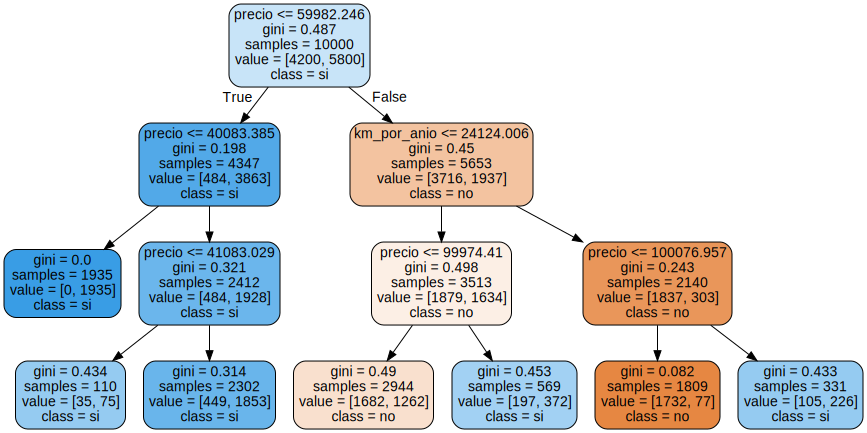

In [18]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)

features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,  class_names=['no', 'si'], feature_names=features)
graph = graphviz.Source(dot_data)
graph

In [17]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = dataset.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 78.67
Intervalo [76.40, 80.94]


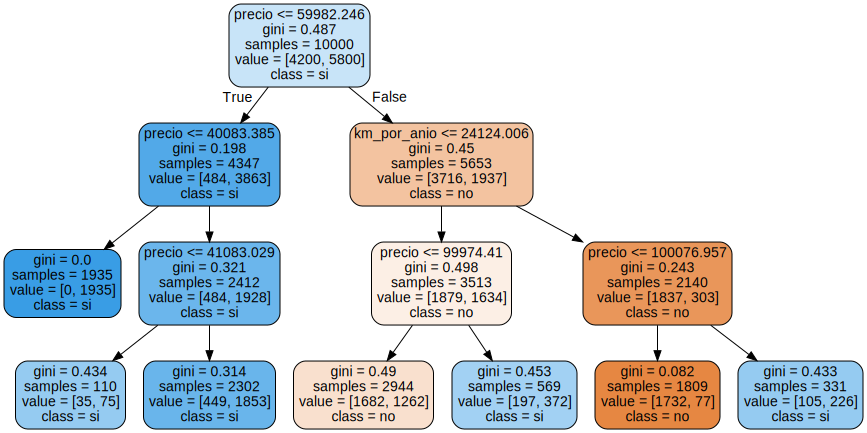

In [19]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)

features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,  class_names=['no', 'si'], feature_names=features)
graph = graphviz.Source(dot_data)
graph

## Hiperparámetros

In [20]:
def iniciar_arbol_de_des(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=3)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = dataset.modelo, return_train_score=False)
  imprime_resultados(results)

iniciar_arbol_de_des(3)

Accuracy media 78.67
Intervalo [76.40, 80.94]


In [21]:
def iniciar_arbol_de_des(max_depth):
  SEED = 301
  np.random.seed(SEED)
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=3)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = dataset.modelo, return_train_score=False)
  imprime_resultados(results)
  test_score = results['test_score'].mean()*100
  print('Arbol max_depth = %d, testing = %.2f' % (max_depth, test_score))

for i in range(1,33):
  iniciar_arbol_de_des(i)

Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 1, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 2, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 3, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 4, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 5, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 6, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 7, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 8, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 9, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 10, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 11, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 12, testing = 78.67
A

## Optimización de un hiper parámetro y el problema de overfit

In [22]:
def iniciar_arbol_de_des(max_depth):
  SEED = 301
  np.random.seed(SEED)
  
  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=3)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = dataset.modelo, return_train_score=False)
  imprime_resultados(results)
  test_score = results['test_score'].mean()*100
  print('Arbol max_depth = %d, testing = %.2f' % (max_depth, test_score))

for i in range(1,33):
  iniciar_arbol_de_des(i)

Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 1, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 2, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 3, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 4, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 5, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 6, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 7, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 8, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 9, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 10, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 11, testing = 78.67
Accuracy media 78.67
Intervalo [76.40, 80.94]
Arbol max_depth = 12, testing = 78.67
A